In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib_venn import venn3, venn3_circles

In [2]:
x = set() # plk vs vnt
y = set() # plk vs swt
z = set() # swt vs vnt

In [3]:
with open('mydeseq2.sig.Plk.Vnt.venn.tsv', 'r') as f:
    for line in f:
        fields = line.split("\t")
        if fields[0] != "Gene_number":
            x.add(fields[0])

with open('mydeseq2.sig.Plk.Swt.venn.tsv', 'r') as f:
    for line in f:
        fields = line.split("\t")
        if fields[0] != "Gene_number":
            y.add(fields[0])

with open('mydeseq2.sig.Swt.Vnt.venn.tsv', 'r') as f:
    for line in f:
        fields = line.split("\t")
        if fields[0] != "Gene_number":
            z.add(fields[0])

In [4]:
all_three = x & y & z
x_and_y = x & y - z
y_and_z = y & z - x
x_and_z = x & z - y
x_only = x - y - z
y_only = y - x - z
z_only = z - x - y

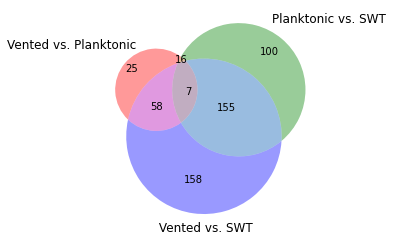

In [5]:
fig = plt.figure()
venn3([x, y, z], set_labels = ('Vented vs. Planktonic', 'Planktonic vs. SWT', ' Vented vs. SWT'))
fig.savefig('venn.pdf')

In [6]:
target = open('venn_vibrio_list.txt', 'w')

In [7]:
target.write("All three comparisons: ")
target.write(str(len(all_three)))
target.write(" genes\n")
for i in all_three:
    target.write(i)
    target.write("\n")

target.write("Plk-Vnt and Plk-Swt: ")
target.write(str(len(x_and_y)))
target.write(" genes\n")
for i in x_and_y:
    target.write(i)
    target.write("\n")
    
target.write("Plk-Vnt and Swt-Vnt: ")
target.write(str(len(x_and_z)))
target.write(" genes\n")
for i in x_and_z:
    target.write(i)
    target.write("\n")
    
target.write("Plk-Swt and Swt-Vnt: ")
target.write(str(len(y_and_z)))
target.write(" genes\n")
for i in y_and_z:
    target.write(i)
    target.write("\n")
    
target.write("Plk-Vnt only: ")
target.write(str(len(x_only)))
target.write(" genes\n")
for i in x_only:
    target.write(i)
    target.write("\n")
    
target.write("Plk-Swt only: ")
target.write(str(len(y_only)))
target.write(" genes\n")
for i in y_only:
    target.write(i)
    target.write("\n")
    
target.write("Swt-Vnt only: ")
target.write(str(len(z_only)))
target.write(" genes\n")
for i in z_only:
    target.write(i)
    target.write("\n")

In [8]:
target.close()